### Hipótese 3 (Regressão Linear)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível prever o número de vendas em outras regiões do mundo baseado nas vendas da América do Norte e Europa?

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0
5,Tetris,GB,1989,Puzzle,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366655,...,0,0,0,1,0,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,0.272727,0.315608,0.636008,0.272469,0.361081,...,0,0,0,1,0,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350418,...,0,0,0,1,0,0,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.349130,0.239641,0.459883,0.211921,0.343148,...,0,0,0,1,0,0,0,0,0,0
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.651112,0.021754,0.027397,0.044465,0.343027,...,0,0,0,1,0,0,0,0,0,0


In [3]:
X = df[['NA_Sales','EU_Sales']].copy()
y = df['Other_Sales'].copy()

In [4]:
lr = LinearRegression()
lr_scores = []

kf = KFold(n_splits = 20, shuffle = True, random_state = 42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))

print("Média acertos da LinearRegression:",np.mean(lr_scores))

Média acertos da LinearRegression: 0.6089061336314284


Melhor resultado obtido:  0.9633950153987378


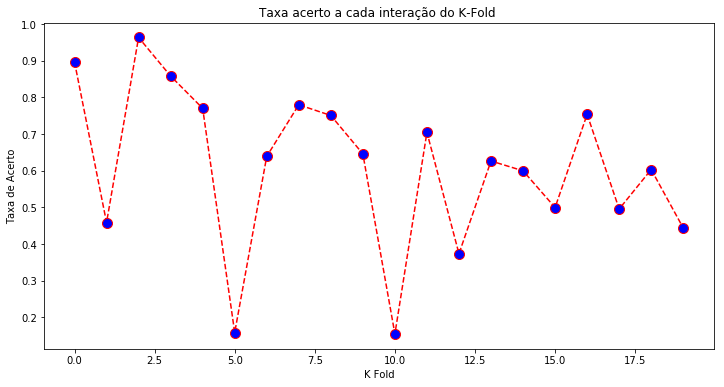

In [5]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, len(lr_scores)), lr_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto a cada interação do K-Fold ')  
plt.xlabel('K Fold')  
plt.ylabel('Taxa de Acerto')
print("Melhor resultado obtido: ",max(lr_scores))

### Parâmetros do Linear Regressor:

- fit_intercept => whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).
- n_jobs => The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

In [6]:
# Variando os parâmetros

lr_1 = LinearRegression(fit_intercept=False)
lr_2 = LinearRegression(n_jobs=10)
lr_3 = LinearRegression(n_jobs=20)
lr_4 = LinearRegression(n_jobs=30)
lr_5 = LinearRegression(n_jobs=40)
lr_6 = LinearRegression(n_jobs=50)

scores_lr_1 = []
scores_lr_2 = []
scores_lr_3 = []
scores_lr_4 = []
scores_lr_5 = []
scores_lr_6 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_1.fit(X_train, y_train)
    scores_lr_1.append(lr_1.score(X_test, y_test))
    
    lr_2.fit(X_train, y_train)
    scores_lr_2.append(lr_2.score(X_test, y_test))
    
    lr_3.fit(X_train, y_train)
    scores_lr_3.append(lr_3.score(X_test, y_test))
    
    lr_4.fit(X_train, y_train)
    scores_lr_4.append(lr_4.score(X_test, y_test))
    
    lr_5.fit(X_train, y_train)
    scores_lr_5.append(lr_5.score(X_test, y_test))
    
    lr_6.fit(X_train, y_train)
    scores_lr_6.append(lr_6.score(X_test, y_test))
    
best_scores_foreach_configuration = []
best_scores_foreach_configuration.append(max(scores_lr_1))
best_scores_foreach_configuration.append(max(scores_lr_2))
best_scores_foreach_configuration.append(max(scores_lr_3))
best_scores_foreach_configuration.append(max(scores_lr_4))
best_scores_foreach_configuration.append(max(scores_lr_5))
best_scores_foreach_configuration.append(max(scores_lr_6))

best_scores_foreach_configuration

[0.9651642319186213,
 0.9633950153987378,
 0.9633950153987378,
 0.9633950153987378,
 0.9633950153987378,
 0.9633950153987378]

In [7]:
lrs = [lr_1, lr_2, lr_3, lr_4, lr_5, lr_6]
best_score = max(best_scores_foreach_configuration)
best_lr = lrs[best_scores_foreach_configuration.index(best_score)]
best_lr

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)